In [127]:
import pandas as pd
import pycountry
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pathlib import Path
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ProgbarLogger
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping

In [128]:
dfolder = 'data/'

In [129]:
df = pd.read_csv(dfolder + 'merged.csv')

/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_45833/446111836.py:1: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dfolder + 'merged.csv')


In [130]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df = df[df['year'] >= 1989]

In [133]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23668,198901,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23669,198901,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23670,198901,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
filtered_df = df[df['country'] == 'Afghanistan']
filtered_df.dtypes

MonthYear            int64
isocode             object
month                int64
year                 int64
count_events_1     float64
                    ...   
deaths             float64
state_deaths       float64
nonstate_deaths    float64
onesided_deaths    float64
civilian_deaths    float64
Length: 70, dtype: object

In [135]:
df.columns

Index(['MonthYear', 'isocode', 'month', 'year', 'count_events_1',
       'count_events_2', 'count_events_3', 'count_events_4', 'count_events_5',
       'count_events_6', 'count_events_7', 'count_events_8', 'count_events_9',
       'count_events_10', 'count_events_11', 'count_events_12',
       'count_events_13', 'count_events_14', 'count_events_15',
       'count_events_16', 'count_events_17', 'count_events_18',
       'count_events_19', 'count_events_20', 'count_events_1_gov',
       'count_events_2_gov', 'count_events_3_gov', 'count_events_4_gov',
       'count_events_5_gov', 'count_events_6_gov', 'count_events_7_gov',
       'count_events_8_gov', 'count_events_9_gov', 'count_events_10_gov',
       'count_events_11_gov', 'count_events_12_gov', 'count_events_13_gov',
       'count_events_14_gov', 'count_events_15_gov', 'count_events_16_gov',
       'count_events_17_gov', 'count_events_18_gov', 'count_events_19_gov',
       'count_events_20_gov', 'count_events_1_opp', 'count_events_2_o

In [136]:
cols = ['country', 'deaths', 'state_deaths', 'nonstate_deaths', 'onesided_deaths', 'civilian_deaths']
for col in cols:
    pct_missing = df[col].isnull().sum() * 100 / len(df)
    print(f'{col}: {pct_missing}%')


country: 85.76270820514482%
deaths: 85.76270820514482%
state_deaths: 85.76270820514482%
nonstate_deaths: 85.76270820514482%
onesided_deaths: 85.76270820514482%
civilian_deaths: 85.76270820514482%


In [137]:
df_no_nan_country = df[df['country'].notna()]
df_no_nan_country

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23705,198901,COL,1,1989,54.0,30.0,44.0,180.0,42.0,4.0,...,0.0,14.0,4.0,0.0,Colombia,9.0,9.0,0.0,0.0,0.0
23722,198901,ETH,1,1989,36.0,52.0,74.0,254.0,76.0,12.0,...,0.0,4.0,2.0,0.0,Ethiopia,2716.0,2716.0,0.0,0.0,0.0
23728,198901,GBR,1,1989,1030.0,350.0,444.0,1522.0,360.0,94.0,...,6.0,0.0,0.0,0.0,United Kingdom,3.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115802,202303,THA,3,2023,2554.0,1570.0,1626.0,6782.0,1834.0,700.0,...,32.0,2.0,34.0,0.0,Thailand,2.0,2.0,0.0,0.0,0.0
115810,202303,TUR,3,2023,5276.0,2946.0,4304.0,14786.0,5360.0,1374.0,...,32.0,18.0,38.0,0.0,Turkey,1.0,1.0,0.0,0.0,0.0
115814,202303,UGA,3,2023,2102.0,1256.0,1160.0,3526.0,1514.0,380.0,...,14.0,8.0,30.0,0.0,Uganda,1.0,0.0,0.0,1.0,1.0
115815,202303,UKR,3,2023,25644.0,12548.0,14472.0,49040.0,16670.0,5434.0,...,112.0,42.0,124.0,0.0,Ukraine,829.0,829.0,0.0,0.0,170.0


In [138]:
df['nonstate_deaths'].fillna(0, inplace=True)
df['onesided_deaths'].fillna(0, inplace=True)
df['civilian_deaths'].fillna(0, inplace=True)
df['deaths'].fillna(0, inplace=True)
df['state_deaths'].fillna(0, inplace=True)


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_45833/1456559570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nonstate_deaths'].fillna(0, inplace=True)
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_45833/1456559570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onesided_deaths'].fillna(0, inplace=True)
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_45833/1456559570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [139]:
df.MonthYear.dtype
df.year.dtype
df.month.dtype

dtype('int64')

Preprocessing

In [140]:
# 'year' and 'month' columns to a datetime type
df['Date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# columns to be filled
fill_cols = [col for col in df.columns if 'count' in col]

dfs = []

# Iterate through unique 'isocode' values
for isocode in df['isocode'].unique():
    df_isocode = df[df['isocode'] == isocode].copy()

    # Create a new dataframe that covers all months between the min and max 'Date' for this isocode
    min_date = df_isocode['Date'].min()
    max_date = df_isocode['Date'].max()
    all_dates = pd.DataFrame(pd.date_range(min_date, max_date, freq='MS'), columns=['Date'])

    # merge onto the existing dataframe
    df_isocode = pd.merge(all_dates, df_isocode, on='Date', how='left')

    df_isocode['isocode'] = isocode

    # forward-fill and then fill any remaining NaNs with 0
    df_isocode[fill_cols] = df_isocode[fill_cols].ffill().fillna(0)

    # convert the 'date' back to 'year' and 'month'
    df_isocode['year'] = df_isocode['Date'].dt.year
    df_isocode['month'] = df_isocode['Date'].dt.month

    # append to list
    dfs.append(df_isocode)

# concatenate all DataFrames in the list into a final DataFrame
df_final = pd.concat(dfs)

df_final.drop(columns=['Date'], inplace=True)

# sort final dataframe by 'isocode', 'year' and 'month'
df_final.sort_values(['year', 'month', 'isocode'], inplace=True)
df_final.fillna(0)


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_45833/1128609220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,198901.0,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
0,198901.0,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
0,198901.0,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
0,198901.0,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
0,198901.0,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,202305.0,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,202305.0,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,Yemen,0.0,0.0,0.0,0.0,0.0
412,202305.0,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,South Africa,0.0,0.0,0.0,0.0,0.0
412,202305.0,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,Zambia,0.0,0.0,0.0,0.0,0.0


In [141]:
df_final
df_final.drop(['MonthYear'],axis=1, inplace=True)

In [142]:
def get_country_name(iso_code):
    try:
        return pycountry.countries.get(alpha_3=iso_code).name
    except AttributeError:
        return None

df_final['country'] = df_final['isocode'].apply(get_country_name)

In [143]:
filtered_df = df_final[df_final['country'] == 'Afghanistan']
filtered_df

,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,count_events_7,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,134.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
1,AFG,2,1989,916.0,516.0,630.0,2228.0,680.0,276.0,292.0,...,20.0,20.0,172.0,0.0,Afghanistan,86.0,86.0,0.0,0.0,23.0
2,AFG,3,1989,546.0,274.0,206.0,1148.0,370.0,104.0,116.0,...,16.0,28.0,218.0,0.0,Afghanistan,1720.0,1720.0,0.0,0.0,96.0
3,AFG,4,1989,364.0,262.0,182.0,976.0,290.0,68.0,118.0,...,10.0,40.0,258.0,0.0,Afghanistan,494.0,494.0,0.0,0.0,86.0
4,AFG,5,1989,312.0,150.0,156.0,706.0,190.0,20.0,38.0,...,0.0,16.0,80.0,0.0,Afghanistan,454.0,448.0,6.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,AFG,1,2023,5402.0,2374.0,1696.0,10364.0,2576.0,1148.0,1420.0,...,392.0,196.0,410.0,0.0,Afghanistan,0.0,0.0,0.0,0.0,0.0
409,AFG,2,2023,3492.0,1978.0,1316.0,8164.0,1830.0,516.0,1238.0,...,342.0,106.0,226.0,0.0,Afghanistan,0.0,0.0,0.0,0.0,0.0
410,AFG,3,2023,5510.0,2782.0,1522.0,9302.0,2944.0,952.0,1482.0,...,434.0,174.0,528.0,0.0,Afghanistan,50.0,45.0,0.0,5.0,10.0
411,AFG,4,2023,6826.0,2886.0,2616.0,13078.0,3622.0,1196.0,1990.0,...,772.0,164.0,568.0,2.0,Afghanistan,0.0,0.0,0.0,0.0,0.0


Every country isocode has the correct number of months in MonthYear. No months are missing.
For every country, the months are in ascending order, meaning the data for each isocode is ordered correctly by time.


In [144]:
df_final

,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,count_events_7,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,134.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
0,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,46.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
0,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,6.0,...,0.0,0.0,0.0,0.0,Albania,0.0,0.0,0.0,0.0,0.0
0,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,United Arab Emirates,0.0,0.0,0.0,0.0,0.0
0,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,20.0,...,0.0,2.0,8.0,0.0,Argentina,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,12.0,...,0.0,2.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0
412,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,102.0,...,2.0,2.0,4.0,0.0,Yemen,0.0,0.0,0.0,0.0,0.0
412,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,1570.0,...,6.0,2.0,12.0,0.0,South Africa,0.0,0.0,0.0,0.0,0.0
412,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,128.0,...,0.0,0.0,0.0,0.0,Zambia,0.0,0.0,0.0,0.0,0.0


In [145]:
def check_month_year_sequence(group):
    # Create the expected sequence of months and years
    min_year, min_month = group[['year', 'month']].iloc[0] # use the first row of each group
    max_year, max_month = group[['year', 'month']].iloc[-1] # use the last row of each group

    expected_month_years = [(y, m) for y in range(min_year, max_year + 1) for m in range(1, 13)]
    
    # If there is only one year in the data, filter for months within the min and max range
    if min_year == max_year:
        expected_month_years = [my for my in expected_month_years if min_month <= my[1] <= max_month]
    else:
        # If there are multiple years, adjust for the first and last years
        expected_month_years = [my for my in expected_month_years if 
                                not (my[0] == min_year and my[1] < min_month) and 
                                not (my[0] == max_year and my[1] > max_month)]
                                
    # Check if the sequence of month-years in the group is equal to the expected sequence
    actual_month_years = sorted(list(zip(group['year'], group['month'])))
    
    if actual_month_years != expected_month_years:
        print(f"Incorrect sequence for isocode: {group['isocode'].iloc[0]}")
        print(f"Expected: {expected_month_years}")
        print(f"Actual: {actual_month_years}")
        
    return actual_month_years == expected_month_years


In [146]:
# Apply the function to each group
is_sequence_correct = df_final.groupby('isocode').apply(check_month_year_sequence)

# Check if the sequence of month-years is correct for all isocodes
assert is_sequence_correct.all(), "The sequence of month-years is not correct for some isocodes"


In [147]:
df_final

,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,count_events_7,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,134.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
0,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,46.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
0,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,6.0,...,0.0,0.0,0.0,0.0,Albania,0.0,0.0,0.0,0.0,0.0
0,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,United Arab Emirates,0.0,0.0,0.0,0.0,0.0
0,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,20.0,...,0.0,2.0,8.0,0.0,Argentina,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,12.0,...,0.0,2.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0
412,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,102.0,...,2.0,2.0,4.0,0.0,Yemen,0.0,0.0,0.0,0.0,0.0
412,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,1570.0,...,6.0,2.0,12.0,0.0,South Africa,0.0,0.0,0.0,0.0,0.0
412,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,128.0,...,0.0,0.0,0.0,0.0,Zambia,0.0,0.0,0.0,0.0,0.0


In [148]:
df_final['date'] = pd.to_datetime(df_final[['year', 'month']].assign(day=1))

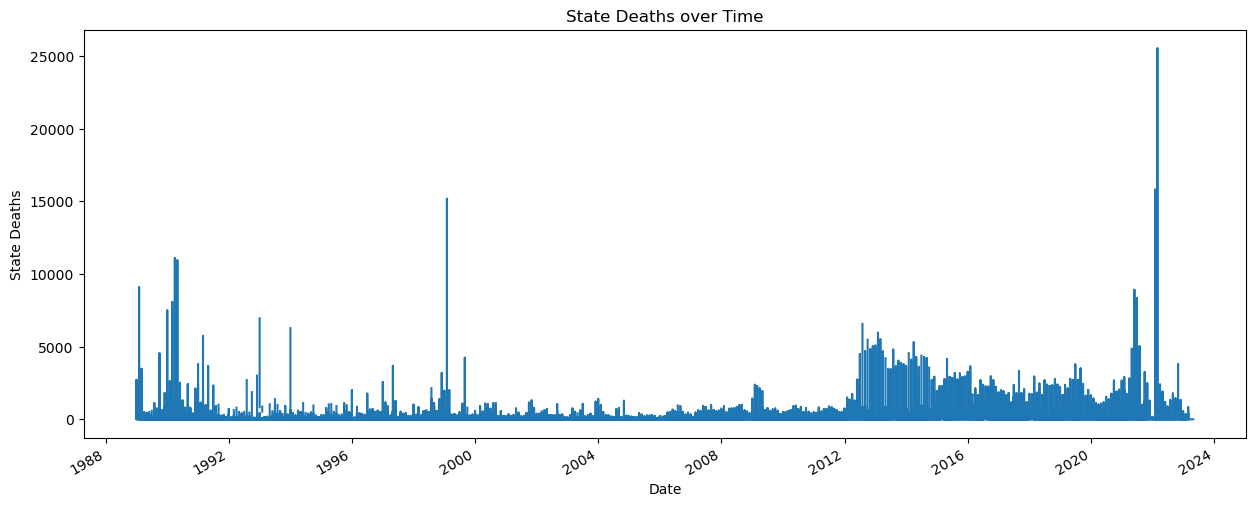

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
df_final.set_index('date')['state_deaths'].plot()
plt.title('State Deaths over Time')
plt.xlabel('Date')
plt.ylabel('State Deaths')
plt.show()


In [150]:

# df_final['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
# df_final.set_index('date', inplace=True)

# # list of all countries
# countries = df_final['country'].unique()

# # store the lagged features
# df_lagged = pd.DataFrame()

# # Loop over each country
# for country in countries:
#     df_country = df[df['country'] == country].copy()
#     df_country['deaths_lag'] = df_country['deaths'].shift(1) 
#     df_lagged = pd.concat([df_lagged, df_country])

# # Drop rows with missing values
# df_lagged.dropna(subset=['deaths_lag'], inplace=True)


In [151]:
df_final = df_final.sort_values(['year', 'month', 'isocode'])


In [152]:
df_final

,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,count_events_7,...,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths,date
0,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,134.0,...,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0,1989-01-01
0,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,46.0,...,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0,1989-01-01
0,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,6.0,...,0.0,0.0,0.0,Albania,0.0,0.0,0.0,0.0,0.0,1989-01-01
0,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,0.0,...,0.0,0.0,0.0,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,1989-01-01
0,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,20.0,...,2.0,8.0,0.0,Argentina,0.0,0.0,0.0,0.0,0.0,1989-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,12.0,...,2.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,2023-05-01
412,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,102.0,...,2.0,4.0,0.0,Yemen,0.0,0.0,0.0,0.0,0.0,2023-05-01
412,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,1570.0,...,2.0,12.0,0.0,South Africa,0.0,0.0,0.0,0.0,0.0,2023-05-01
412,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,128.0,...,0.0,0.0,0.0,Zambia,0.0,0.0,0.0,0.0,0.0,2023-05-01


In [153]:
# List of all event count columns for gov, opp and total events
event_cols = ['count_events_{}'.format(i) for i in range(1, 21)]
event_cols_gov = ['count_events_{}_gov'.format(i) for i in range(1, 21)]
event_cols_opp = ['count_events_{}_opp'.format(i) for i in range(1, 21)]

# Compute the total events for each group
df_final['total_events'] = df_final[event_cols].sum(axis=1)
df_final['total_events_gov'] = df_final[event_cols_gov].sum(axis=1)
df_final['total_events_opp'] = df_final[event_cols_opp].sum(axis=1)

# Compute the share of each type of event for each group and create new columns
for col in event_cols:
    df_final['share_events_{}'.format(col)] = df_final[col] / df_final['total_events']
    
for col in event_cols_gov:
    df_final['share_events_{}'.format(col)] = df_final[col] / df_final['total_events_gov']

for col in event_cols_opp:
    df_final['share_events_{}'.format(col)] = df_final[col] / df_final['total_events_opp']

# Drop the original count_events_* columns
df_final.drop(columns=event_cols + event_cols_gov + event_cols_opp, inplace=True)
df_final = df_final.fillna(0)



In [154]:
df_final

,isocode,month,year,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths,date,...,share_events_count_events_11_opp,share_events_count_events_12_opp,share_events_count_events_13_opp,share_events_count_events_14_opp,share_events_count_events_15_opp,share_events_count_events_16_opp,share_events_count_events_17_opp,share_events_count_events_18_opp,share_events_count_events_19_opp,share_events_count_events_20_opp
0,AFG,1,1989,Afghanistan,693.0,693.0,0.0,0.0,0.0,1989-01-01,...,0.043269,0.096154,0.009615,0.000000,0.0,0.009615,0.000000,0.033654,0.182692,0.0
0,AGO,1,1989,Angola,249.0,249.0,0.0,0.0,0.0,1989-01-01,...,0.000000,0.000000,0.076923,0.000000,0.0,0.000000,0.000000,0.000000,0.153846,0.0
0,ALB,1,1989,Albania,0.0,0.0,0.0,0.0,0.0,1989-01-01,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
0,ARE,1,1989,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,1989-01-01,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
0,ARG,1,1989,Argentina,0.0,0.0,0.0,0.0,0.0,1989-01-01,...,0.100000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.050000,0.200000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,XKX,5,2023,0,0.0,0.0,0.0,0.0,0.0,2023-05-01,...,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.0
412,YEM,5,2023,Yemen,0.0,0.0,0.0,0.0,0.0,2023-05-01,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.021277,0.021277,0.042553,0.0
412,ZAF,5,2023,South Africa,0.0,0.0,0.0,0.0,0.0,2023-05-01,...,0.086614,0.047244,0.015748,0.062992,0.0,0.000000,0.023622,0.007874,0.047244,0.0
412,ZMB,5,2023,Zambia,0.0,0.0,0.0,0.0,0.0,2023-05-01,...,0.500000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [155]:
# columns to drop
cols_to_drop = ['total_events', 'total_events_gov', 'total_events_opp',
                'nonstate_deaths', 'onesided_deaths', 'civilian_deaths', 'state_deaths', 'date', 'country']

# Drop the columns
df_final = df_final.drop(columns=cols_to_drop, axis=1)


In [156]:
# Define conflict column
df_final['conflict'] = df_final['deaths'].apply(lambda x: 1 if x > 100 else 0)

# Drop rows with missing values
df_final = df_final.dropna()

# Train and test splits
train, test = train_test_split(df_final, test_size=0.2, shuffle=False)

# Separate target variable
y_train = train['conflict']
y_test = test['conflict']
train = train.drop(columns=['conflict'])
test = test.drop(columns=['conflict'])

# One-hot encoding for 'isocode' column
enc = OneHotEncoder(handle_unknown='ignore')

# Fit on train data
train_encoded = enc.fit_transform(train['isocode'].values.reshape(-1, 1)).toarray()
test_encoded = enc.transform(test['isocode'].values.reshape(-1, 1)).toarray()

# Get the list of unique categories from the encoder
categories = enc.categories_[0]

# Create DataFrame from encoded data, with original column names
dfOneHot_train = pd.DataFrame(train_encoded, columns = ["isocode_"+str(c) for c in categories])
dfOneHot_test = pd.DataFrame(test_encoded, columns = ["isocode_"+str(c) for c in categories])

# Reset index for concatenation
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# Concatenate the original dataframe and the one-hot encoded dataframe
train = pd.concat([train, dfOneHot_train], axis=1)
test = pd.concat([test, dfOneHot_test], axis=1)

In [157]:
# Create a list of columns to scale. Exclude the one-hot encoded columns, 'year', 'month', and 'conflict' 
scale_cols = [col for col in train.columns if 'isocode' not in col and col not in ['year', 'month', 'conflict']]

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler on the train data and transform both train and test data
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.transform(test[scale_cols])

In [158]:
test

,isocode,month,year,deaths,share_events_count_events_1,share_events_count_events_2,share_events_count_events_3,share_events_count_events_4,share_events_count_events_5,share_events_count_events_6,...,isocode_VIR,isocode_VNM,isocode_VUT,isocode_WLF,isocode_WSM,isocode_XKX,isocode_YEM,isocode_ZAF,isocode_ZMB,isocode_ZWE
0,ARG,8,2016,0.0,0.137083,0.062747,0.089599,0.285472,0.090447,0.029112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ARM,8,2016,0.0,0.122376,0.047976,0.069530,0.274128,0.084617,0.023070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ASM,8,2016,0.0,0.173160,0.090909,0.060606,0.259740,0.108225,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ATA,8,2016,0.0,0.160804,0.060302,0.097152,0.346734,0.061977,0.020101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ATG,8,2016,0.0,0.166287,0.062642,0.045558,0.378132,0.069476,0.018223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19563,XKX,5,2023,0.0,0.092308,0.076923,0.089231,0.307692,0.190769,0.003077,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19564,YEM,5,2023,0.0,0.082192,0.046456,0.054199,0.406194,0.107802,0.011316,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19565,ZAF,5,2023,0.0,0.151882,0.068819,0.066460,0.250162,0.075432,0.027472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19566,ZMB,5,2023,0.0,0.146992,0.100533,0.067022,0.275704,0.142422,0.018279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [159]:
train.drop(['isocode'],axis=1, inplace=True)
test.drop(['isocode'],axis=1, inplace=True)

Class imbalance.

In [160]:
# # Apply PCA on the features
# pca = PCA(n_components=0.99)
# train_pca = pca.fit_transform(train)
# test_pca = pca.transform(test)

# # Explained variance ratios
# explained_variances = pca.explained_variance_ratio_

# # Selected components
# component_names = ["PC" + str(i) for i in range(1, len(explained_variances)+1)]

# # DataFrames with the transformed data and original column names
# train = pd.DataFrame(train_pca, columns=component_names)
# train['conflict'] = y_train  # append y_train back to the dataframe

# test = pd.DataFrame(test_pca, columns=component_names)
# test['conflict'] = y_test  # append y_test back to the dataframe


In [161]:
# pca.explained_variance_ratio_

In [162]:
# We'll now turn them into numpy arrays to make them easier to work with
X_train = train.values
X_test = test.values
# Append y_train and y_test back to the datasets
train['conflict'] = y_train.values
test['conflict'] = y_test.values 

In [163]:
train

,month,year,deaths,share_events_count_events_1,share_events_count_events_2,share_events_count_events_3,share_events_count_events_4,share_events_count_events_5,share_events_count_events_6,share_events_count_events_7,...,isocode_VNM,isocode_VUT,isocode_WLF,isocode_WSM,isocode_XKX,isocode_YEM,isocode_ZAF,isocode_ZMB,isocode_ZWE,conflict
0,1,1989,0.001327,0.079903,0.044275,0.058457,0.350052,0.045659,0.015220,0.023175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,1989,0.000477,0.074124,0.048518,0.102426,0.289757,0.163073,0.016173,0.030997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1,1989,0.000000,0.123077,0.084615,0.223077,0.369231,0.034615,0.000000,0.011538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,1989,0.000000,0.116279,0.116279,0.186047,0.279070,0.023256,0.023256,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,1989,0.000000,0.139847,0.034483,0.009579,0.191571,0.055556,0.017241,0.019157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78265,8,2016,0.000002,0.142520,0.072883,0.067276,0.300384,0.105341,0.035409,0.036294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78266,8,2016,0.000000,0.193878,0.035714,0.045918,0.346939,0.158163,0.030612,0.066327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78267,8,2016,0.000000,0.128360,0.058593,0.067955,0.221987,0.088493,0.022048,0.027484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78268,8,2016,0.000000,0.095890,0.082192,0.054795,0.369863,0.054795,0.000000,0.013699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [164]:
test

,month,year,deaths,share_events_count_events_1,share_events_count_events_2,share_events_count_events_3,share_events_count_events_4,share_events_count_events_5,share_events_count_events_6,share_events_count_events_7,...,isocode_VNM,isocode_VUT,isocode_WLF,isocode_WSM,isocode_XKX,isocode_YEM,isocode_ZAF,isocode_ZMB,isocode_ZWE,conflict
0,8,2016,0.0,0.137083,0.062747,0.089599,0.285472,0.090447,0.029112,0.035048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,8,2016,0.0,0.122376,0.047976,0.069530,0.274128,0.084617,0.023070,0.015726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,8,2016,0.0,0.173160,0.090909,0.060606,0.259740,0.108225,0.047619,0.043290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,8,2016,0.0,0.160804,0.060302,0.097152,0.346734,0.061977,0.020101,0.056951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,8,2016,0.0,0.166287,0.062642,0.045558,0.378132,0.069476,0.018223,0.012528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19563,5,2023,0.0,0.092308,0.076923,0.089231,0.307692,0.190769,0.003077,0.018462,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
19564,5,2023,0.0,0.082192,0.046456,0.054199,0.406194,0.107802,0.011316,0.030375,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
19565,5,2023,0.0,0.151882,0.068819,0.066460,0.250162,0.075432,0.027472,0.036306,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
19566,5,2023,0.0,0.146992,0.100533,0.067022,0.275704,0.142422,0.018279,0.048743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [165]:
# def create_sequences(input_data, tw):
#     assert input_data.columns[-1] == 'conflict', "The 'conflict' column must be the last column in the dataframe."
#     inout_seq = []
#     L = len(input_data)
#     for i in range(L-tw):
#         train_seq = input_data.iloc[i:i+tw].values
#         train_label = input_data.iloc[i+tw:i+tw+1,-1].values
#         inout_seq.append((train_seq ,train_label))
#     return inout_seq


# sequence_length = 3

# # Create sequences from the training data
# train_sequences = create_sequences(train, sequence_length)

# # Separate the sequences into X and y
# X_train = np.array([seq[0] for seq in train_sequences])
# y_train = np.array([seq[1][0] for seq in train_sequences]).flatten()  # Add flatten

# # Reshape X to fit LSTM's expected input shape (batch_size, sequence_length, num_features)
# X_train = X_train.reshape((-1, sequence_length, train.shape[1]))

# # create sequences from the test data and prepare for LSTM
# test_sequences = create_sequences(test, sequence_length)
# X_test = np.array([seq[0] for seq in test_sequences])
# y_test = np.array([seq[1] for seq in test_sequences]).flatten()  # Add flatten
# X_test = X_test.reshape((-1, sequence_length, test.shape[1])) # Define the LSTM model

# model = Sequential()
# model.add(LSTM(60, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.2))
# model.add(LSTM(30, dropout=0.2))  # additional LSTM layer
# model.add(Dense(1, activation='sigmoid'))  # Output layer
# model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
# progbar_logger = ProgbarLogger() 


In [166]:
# y_train = pd.Series(y_train)
# count_class_0_train, count_class_1_train = y_train.value_counts()
# total_samples_train = len(y_train)

# # class weights for training data
# weight_for_class_0_train = (1 / count_class_0_train) * (total_samples_train) / 2.0 
# weight_for_class_1_train = (1 / count_class_1_train) * (total_samples_train) / 2.0

# class_weight_train = {0: weight_for_class_0_train, 1: weight_for_class_1_train} 

In [167]:
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2, class_weight=class_weight_train, callbacks=[progbar_logger])

# # Plot training & validation loss values
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.grid(True)
# plt.show()

In [168]:
# Define the series_to_supervised function
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = [], []
    # Input sequence (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'var{j+1}(t-{i})' for j in range(n_vars)]
    # Forecast sequence (t, t+1, ..., t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'var{j+1}(t)' for j in range(n_vars)]
        else:
            names += [f'var{j+1}(t+{i})' for j in range(n_vars)]
    # Concatenate all columns
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Preprocessing the data
train_values = train.drop(columns=['conflict']).values
test_values = test.drop(columns=['conflict']).values

# Define LSTM model
months = 1  
n_features = train_values.shape[1]

model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(months, n_features), dropout=0.2))
model.add(LSTM(30, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='loss', patience=3)


In [170]:
predictions = []

for i in range(len(test)):
    # Prepare the training data
    train = pd.concat([train, test.iloc[i:i+1]], axis=0)
    train_reframed = series_to_supervised(train.drop(columns=['conflict']).values, n_in=months, n_out=1, dropnan=True)

    # Split into input and output variables
    X_train = train_reframed.iloc[:, :-1].values
    y_train = train_reframed.iloc[:, -1].values

    # Reshape input data
    X_train = X_train.reshape((X_train.shape[0], months, n_features))

    # Fit the model
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1, callbacks=[early_stop])

    # Prepare the test data
    test_X = test_values[i, :-1].reshape((1, months, n_features))

    # Make a one-step prediction
    yhat = model.predict(test_X)

ValueError: cannot reshape array of size 47353955 into shape (78271,1,303)

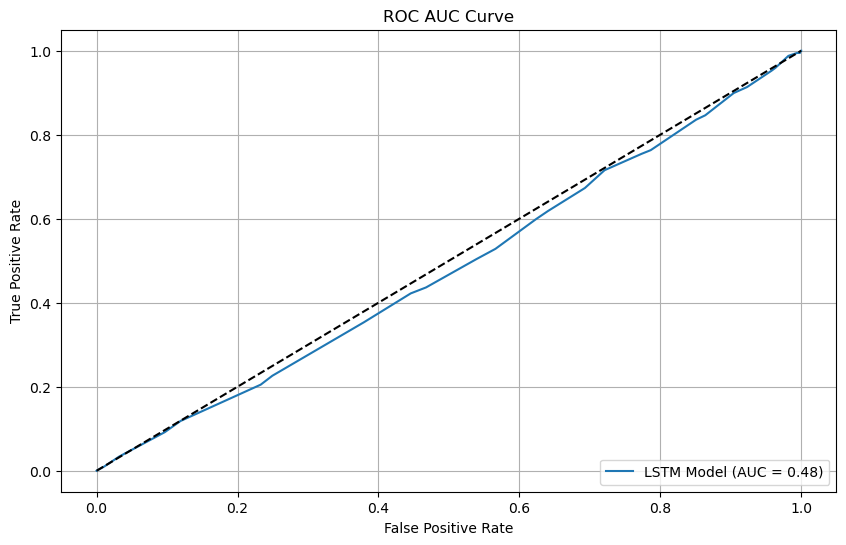

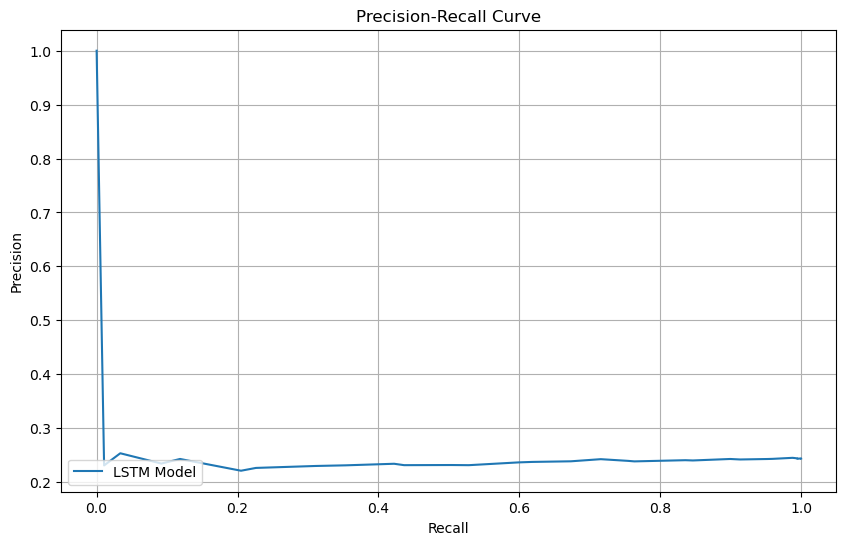

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

y_true = y_test.flatten() 
y_pred = yhat.flatten()

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_true, y_pred)

# Calculate Precision and Recall scores
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot ROC AUC curve
plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_true, y_pred)[:2], label='LSTM Model (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='LSTM Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# classes
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))


print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


roc_auc_minority = roc_auc_score(y_test == 1, y_pred)
print("\nROC AUC for minority class:", roc_auc_minority)


73/73 [==============================] - 0s 4ms/step
Confusion Matrix:
 [[1756    0]
 [ 566    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      1756
           1       0.00      0.00      0.00       566

    accuracy                           0.76      2322
   macro avg       0.38      0.50      0.43      2322
weighted avg       0.57      0.76      0.65      2322


ROC AUC for minority class: 0.4821319333209913


/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
